# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from patsy import dmatrix

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('data_ref', axis=1)
df = df.drop('id_cliente', axis=1)
df= df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  object 
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.

In [3]:
dmatrix('tipo_renda', df)
dmatrix('sexo', df)
dmatrix('tipo_residencia', df)
dmatrix('educacao', df)
dmatrix('estado_civil', df)

DesignMatrix with shape (12427, 5)
  Columns:
    ['Intercept',
     'estado_civil[T.Separado]',
     'estado_civil[T.Solteiro]',
     'estado_civil[T.União]',
     'estado_civil[T.Viúvo]']
  Terms:
    'Intercept' (column 0), 'estado_civil' (columns 1:5)
  (to view full data, use np.asarray(this_obj))

In [4]:
y, X = patsy.dmatrices('np.log(renda+.1) ~ (tempo_emprego) + posse_de_veiculo+ posse_de_imovel+ qtd_filhos +idade + tempo_emprego + qt_pessoas_residencia + tipo_renda+ C(sexo, Treatment(1))+C(tipo_residencia, Treatment(1)) +  C(educacao,Treatment(1) )+C(estado_civil,Treatment(1))', df)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(renda + .1)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:51:21   Log-Likelihood:                -13567.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.7616      0.185     42.065      0.000       7.400       8.123
posse_de_veiculo[T.True]                              0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]                               0.0829      0.014      5.925      0.000       0.055       0.110
tipo_renda[T.Bolsista]                                0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]                              0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]                            -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]                        0.0576      0.022      2.591      0.010       0.014       0.101
C(sexo, Treatment(1))[T.F]                           -0.7874      0.015    -53.723      0.000      -0.816      -0.759
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0442      0.054      0.816      0.415      -0.062       0.150
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0184      0.029      0.625      0.532      -0.039       0.076
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0754      0.091     -0.829      0.407      -0.254       0.103
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1107      0.084      1.319      0.187      -0.054       0.275
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0129      0.039     -0.331      0.741      -0.089       0.064
C(educacao, Treatment(1))[T.Primário]                -0.1071      0.159     -0.673      0.501      -0.419       0.205
C(educacao, Treatment(1))[T.Secundário]              -0.1212      0.142     -0.853      0.394      -0.400       0.157
C(educacao, Treatment(1))[T.Superior completo]       -0.0133      0.142     -0.093      0.926      -0.292       0.265
C(educacao, Treatment(1))[T.Superior incompleto]     -0.1502      0.145     -1.035      0.301      -0.435       0.134
C(estado_civil, Treatment(1))[T.Casado]              -0.3265      0.111     -2.935      0.003      -0.545      -0.108
C(estado_civil, Treatment(1))[T.Solteiro]            -0.0593      0.033     -1.809      0.071      -0.124       0.005
C(estado_civil, Treatment(1))[T.União]               -0.3607      0.113     -3.181      0.001      -0.583      -0.138
C(estado_civil, Treatment(1))[T.Viúvo]                0.0424      0.048      0.875      0.382      -0.053       0.137
tempo_emprego                                         0.0617      0.001     59.398      0.000       0.060       0.064
qtd_filhos                                           -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade          

2. Remova a variável menos significante e analise:

In [5]:
y, X = patsy.dmatrices('np.log(renda+.1) ~ (tempo_emprego) + posse_de_veiculo+ posse_de_imovel+ qtd_filhos +idade + tempo_emprego + qt_pessoas_residencia + tipo_renda+ C(sexo, Treatment(1))+C(tipo_residencia, Treatment(1))+C(estado_civil,Treatment(1))', df)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(renda + .1)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     340.0
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:51:22   Log-Likelihood:                -13600.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12406   BIC:                         2.740e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.6938      0.117     65.714      0.000       7.464       7.923
posse_de_veiculo[T.True]                              0.0533      0.014      3.769      0.000       0.026       0.081
posse_de_imovel[T.True]                               0.0856      0.014      6.110      0.000       0.058       0.113
tipo_renda[T.Bolsista]                                0.2988      0.242      1.237      0.216      -0.175       0.772
tipo_renda[T.Empresário]                              0.1651      0.015     11.079      0.000       0.136       0.194
tipo_renda[T.Pensionista]                            -0.2513      0.242     -1.039      0.299      -0.725       0.223
tipo_renda[T.Servidor público]                        0.0754      0.022      3.400      0.001       0.032       0.119
C(sexo, Treatment(1))[T.F]                           -0.7800      0.015    -53.208      0.000      -0.809      -0.751
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0369      0.054      0.680      0.496      -0.069       0.143
C(tipo_residencia, Treatment(1))[T.Com os pais]       0.0185      0.029      0.627      0.530      -0.039       0.076
C(tipo_residencia, Treatment(1))[T.Comunitário]      -0.0403      0.091     -0.443      0.658      -0.218       0.138
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.1224      0.084      1.456      0.145      -0.042       0.287
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0209      0.039     -0.535      0.593      -0.098       0.056
C(estado_civil, Treatment(1))[T.Casado]              -0.3237      0.112     -2.903      0.004      -0.542      -0.105
C(estado_civil, Treatment(1))[T.Solteiro]            -0.0622      0.033     -1.893      0.058      -0.127       0.002
C(estado_civil, Treatment(1))[T.União]               -0.3611      0.114     -3.177      0.001      -0.584      -0.138
C(estado_civil, Treatment(1))[T.Viúvo]                0.0363      0.049      0.748      0.455      -0.059       0.132
tempo_emprego                                         0.0617      0.001     59.328      0.000       0.060       0.064
qtd_filhos                                           -0.2567      0.108     -2.372      0.018      -0.469      -0.045
idade                                                 0.0049      0.001      6.185      0.000       0.003       0.006
qt_pessoas_residencia                                 0.2846      0.108      2.634      0.008       0.073       0.496
==============================================================================
Omnibus:                        1.222   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                1.192
Skew:         

 - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
     O modelo continua com muitas variaveis, não houve alteração significativa no R² nem no R² ajustado, é necessario realizar mais ajustes.
    
 - Observe os parâmetros e veja se algum se alterou muito.
     Houve queda dos valores de p-values principalmente para a variavel tipo_residencia. 
     
     antes:
     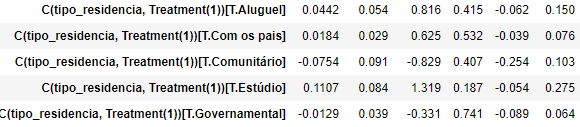
     depois: 
     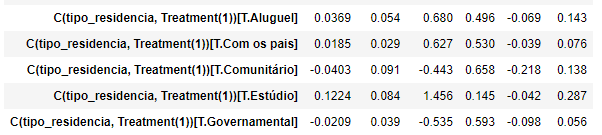


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 

In [6]:
y, X = patsy.dmatrices('np.log(renda+.1) ~ (tempo_emprego) + posse_de_veiculo+ posse_de_imovel+ qtd_filhos +idade + tempo_emprego + C(sexo, Treatment(1))', df)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(renda + .1)   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1098.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:51:22   Log-Likelihood:                -13672.
No. Observations:               12427   AIC:                         2.736e+04
Df Residuals:                   12420   BIC:                         2.741e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.9912      0.034    234.197      0.000       7.924       8.058
posse_de_veiculo[T.True]       0.0561      0.014      3.986      0.000       0.029       0.084
posse_de_imovel[T.True]        0.0866      0.014      6.278      0.000       0.060       0.114
C(sexo, Treatment(1))[T.F]    -0.7688      0.015    -52.769      0.000      -0.797      -0.740
tempo_emprego                  0.0610      0.001     59.084      0.000       0.059       0.063
qtd_filhos                     0.0239      0.009      2.767      0.006       0.007       0.041
idade                          0.0049      0.001      6.399      0.000       0.003       0.006
==============================================================================
Omnibus:                        1.249   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.221
Skew:                           0.022   Prob(JB):                        0.543
Kurtosis:                       3.019   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O modelo mais complexo apresentou R²:0.357, R² ajustado:0.356 e AIC de:2.718, enquanto o modelo simplificado apresentou R²:0.347, R² ajustado:0.346 e AIC de:2.736. Os indicadores de R² e AIC não indicam diferenças signicativas nos modelos por boas praticas será utilizado o modelo mais simples.
